In [1]:
import os
import sys
os.path.dirname(sys.executable)

'c:\\Users\\Darling\\AppData\\Local\\Programs\\Python\\Python312'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('./data/listings_new_york_2024.csv')


In [4]:
# Check the first few rows of the dataset
data.head()

# Get the shape of the dataset (number of rows and columns)
print(f'The dataset has {data.shape[0]} rows and {data.shape[1]} columns.')

# Get a summary of the data types for each column
data.info()

The dataset has 37765 rows and 18 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37765 entries, 0 to 37764
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              37765 non-null  int64  
 1   name                            37763 non-null  object 
 2   host_id                         37765 non-null  int64  
 3   host_name                       37760 non-null  object 
 4   neighbourhood_group             37765 non-null  object 
 5   neighbourhood                   37765 non-null  object 
 6   latitude                        37765 non-null  float64
 7   longitude                       37765 non-null  float64
 8   room_type                       37765 non-null  object 
 9   price                           23044 non-null  float64
 10  minimum_nights                  37765 non-null  int64  
 11  number_of_reviews               37765 non-null  in

In [5]:
# Generate summary statistics for numerical columns
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,3.776500e+04,3.776500e+04,37765.000000,37765.000000,23044.000000,37765.000000,37765.000000,26014.000000,37765.000000,37765.000000,37765.000000
mean,3.653038e+17,1.659684e+08,40.729075,-73.947084,221.074900,29.164597,24.898981,0.905544,53.763035,152.411598,3.993168
std,4.539908e+17,1.800529e+08,0.056343,0.054458,766.620992,30.202538,58.802122,1.860784,161.979723,142.797333,15.762591
min,2.595000e+03,1.678000e+03,40.500366,-74.251907,8.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,2.055254e+07,1.662776e+07,40.688800,-73.983220,86.000000,30.000000,0.000000,0.090000,1.000000,0.000000,0.000000
50%,4.826382e+07,8.218953e+07,40.726440,-73.954540,150.000000,30.000000,3.000000,0.320000,2.000000,126.000000,0.000000
75%,8.276380e+17,3.031569e+08,40.762470,-73.928022,250.000000,30.000000,21.000000,1.130000,8.000000,301.000000,3.000000
max,1.193086e+18,5.869174e+08,40.911390,-73.713650,100000.000000,1250.000000,1915.000000,103.530000,842.000000,365.000000,1568.000000


In [6]:
# Convert any date columns if applicable
data['last_review'] = pd.to_datetime(data['last_review'])

In [7]:
# Get mode and frequency for categorical columns
categorical_columns = ['name','host_name','neighbourhood_group','room_type']
for column in categorical_columns:
    print(f'{column} mode: {data[column].mode()[0]}, frequency: {data[column].value_counts().iloc[0]}')


name mode: Water View King Bed Hotel Room, frequency: 30
host_name mode: Blueground, frequency: 842
neighbourhood_group mode: Manhattan, frequency: 16715
room_type mode: Entire home/apt, frequency: 20023


In [8]:
# Find columns with missing values and the percentage of missing data
missing_data = data.isnull().sum()
missing_percentage = (missing_data / len(data)) * 100
missing_report = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_percentage})
print(missing_report[missing_report['Missing Values'] > 0])


                   Missing Values  Percentage
name                            2    0.005296
host_name                       5    0.013240
price                       14721   38.980538
last_review                 11751   31.116113
reviews_per_month           11751   31.116113
license                     32594   86.307428


In [9]:
# Detect outliers using the IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Detect outliers in the 'price' column
outliers_in_price = detect_outliers(data, 'price')
print(f'Number of outliers in price: {outliers_in_price.shape[0]}')

# Detect outliers in the 'reviews per month' column
outliers_in_reviews_per_month = detect_outliers(data, 'reviews_per_month')
print(f'Number of outliers in reviews per month: {outliers_in_reviews_per_month.shape[0]}')



Number of outliers in price: 1437
Number of outliers in reviews per month: 2188


In [10]:
# Drop columns with more than 50% missing data
data_cleaned = data.drop(columns=missing_report[missing_report['Percentage'] > 50].index)

# Impute missing values for numerical columns (using median)
numerical_columns = data_cleaned.select_dtypes(include=[np.number]).columns
data_cleaned[numerical_columns] = data_cleaned[numerical_columns].fillna(data_cleaned[numerical_columns].median())

# Impute missing values for categorical columns (using mode)
categorical_columns = data_cleaned.select_dtypes(include=['object', 'category']).columns
data_cleaned[categorical_columns] = data_cleaned[categorical_columns].apply(lambda x: x.fillna(x.mode()[0]))


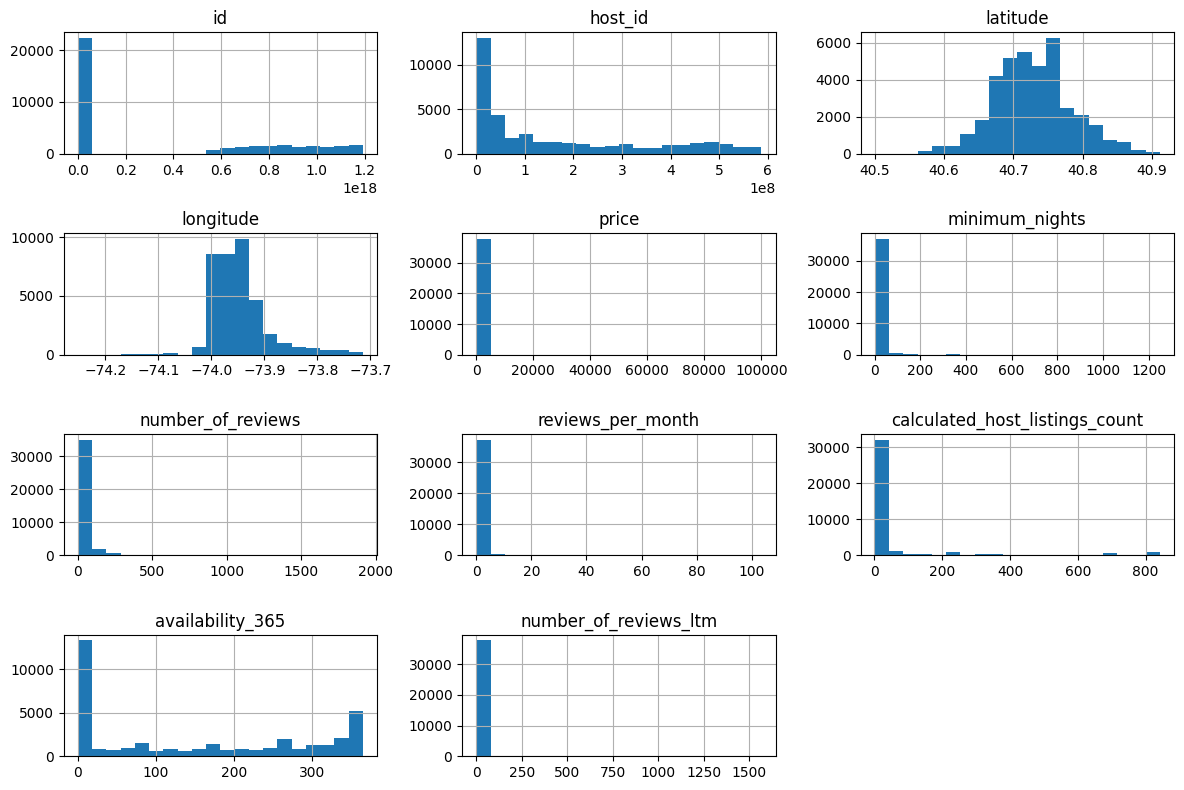

In [11]:
# Histogram for numerical columns
data_cleaned[numerical_columns].hist(figsize=(12, 8), bins=20)
plt.tight_layout()
plt.show()

C:\Users\Darling\AppData\Local\Temp\ipykernel_9736\3536477183.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=45, ha='right')


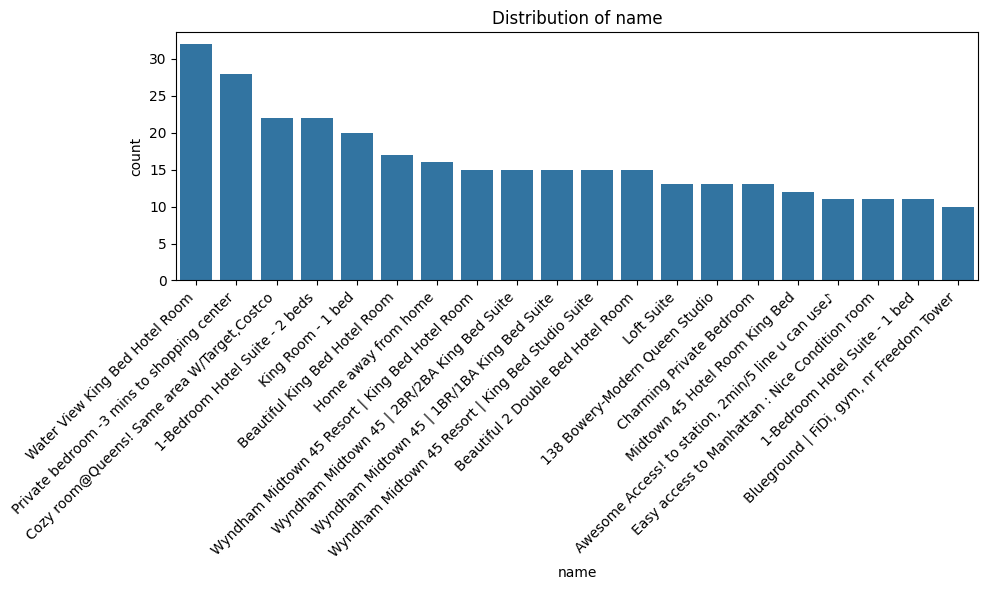

C:\Users\Darling\AppData\Local\Temp\ipykernel_9736\3536477183.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=45, ha='right')


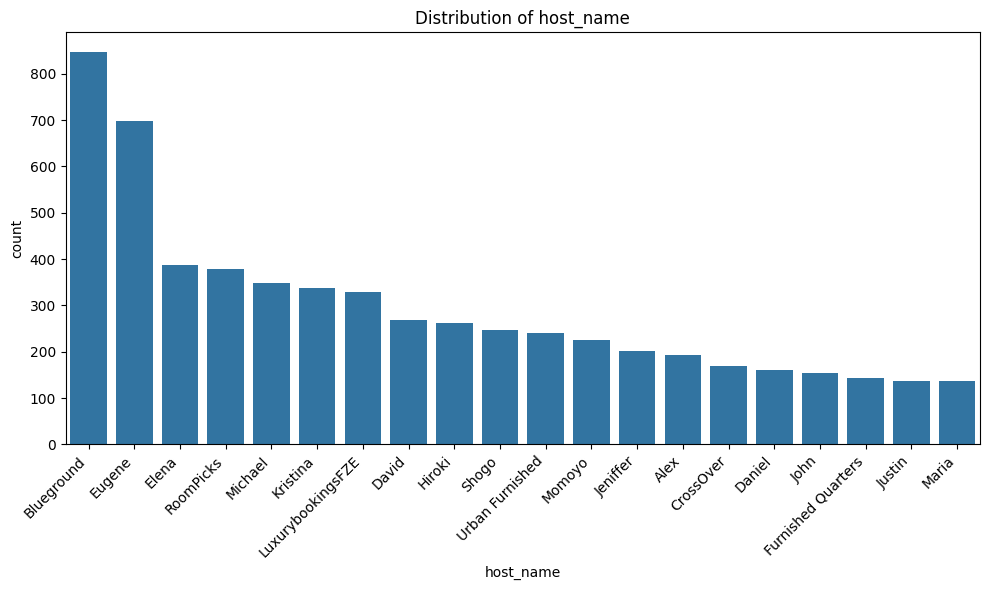

C:\Users\Darling\AppData\Local\Temp\ipykernel_9736\3536477183.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=45, ha='right')


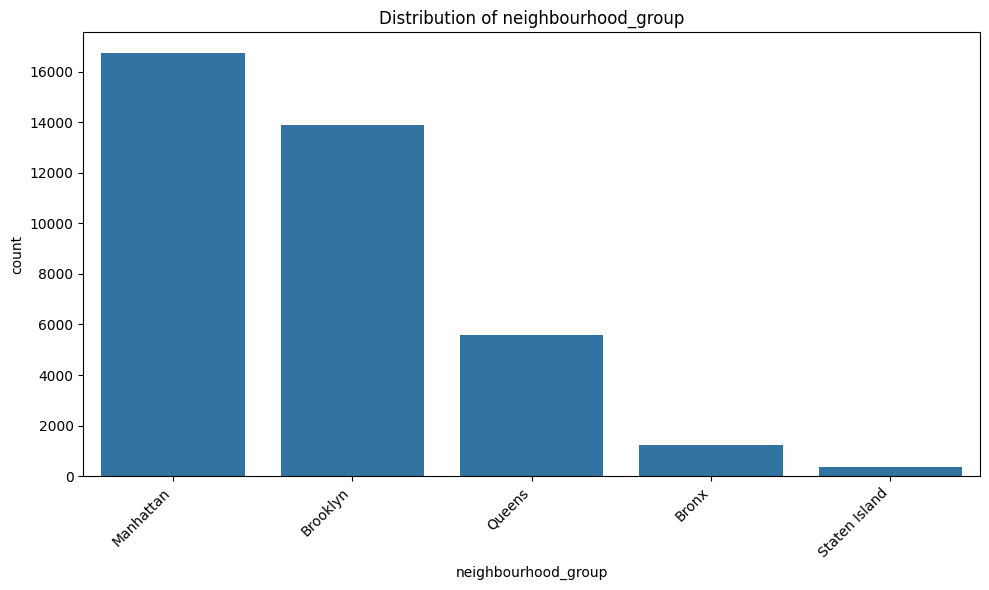

C:\Users\Darling\AppData\Local\Temp\ipykernel_9736\3536477183.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=45, ha='right')


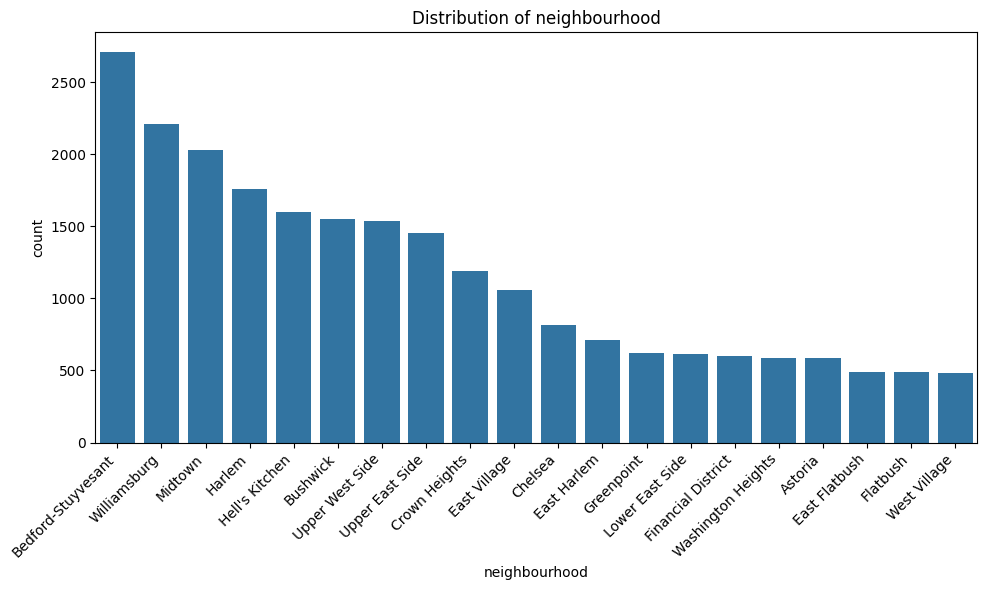

C:\Users\Darling\AppData\Local\Temp\ipykernel_9736\3536477183.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=45, ha='right')


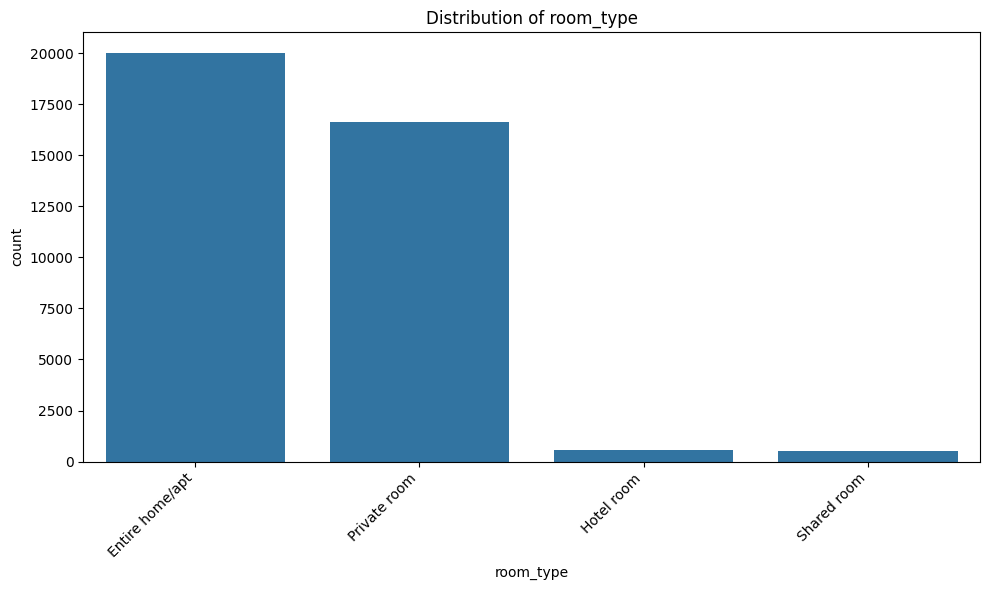

In [12]:
# Bar plot for categorical columns
import matplotlib as mpl
mpl.rcParams['text.usetex'] = False
mpl.rcParams['mathtext.default'] = 'regular'

# Plot top-N categories for readability
TOP_N = 20

for column in categorical_columns:
    counts = data_cleaned[column].value_counts()
    order = counts.index if len(counts) <= TOP_N else counts.nlargest(TOP_N).index
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(x=column, data=data_cleaned, order=order)
    # Escape dollar signs to avoid mathtext parsing errors in labels
    labels = [tick.get_text().replace('$', r'\$') for tick in ax.get_xticklabels()]
    ax.set_xticklabels(labels, rotation=45, ha='right')
    plt.title(f'Distribution of {column}')
    plt.tight_layout()
    plt.show()


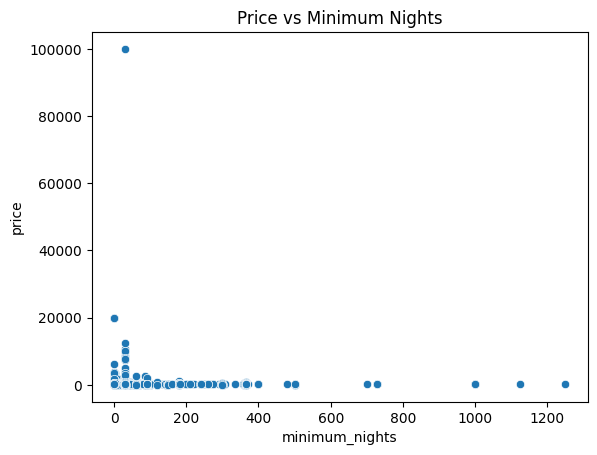

In [13]:
# Scatter plot between 'price' and 'minimum_nights'
sns.scatterplot(x='minimum_nights', y='price', data=data_cleaned)
plt.title('Price vs Minimum Nights')
plt.show()


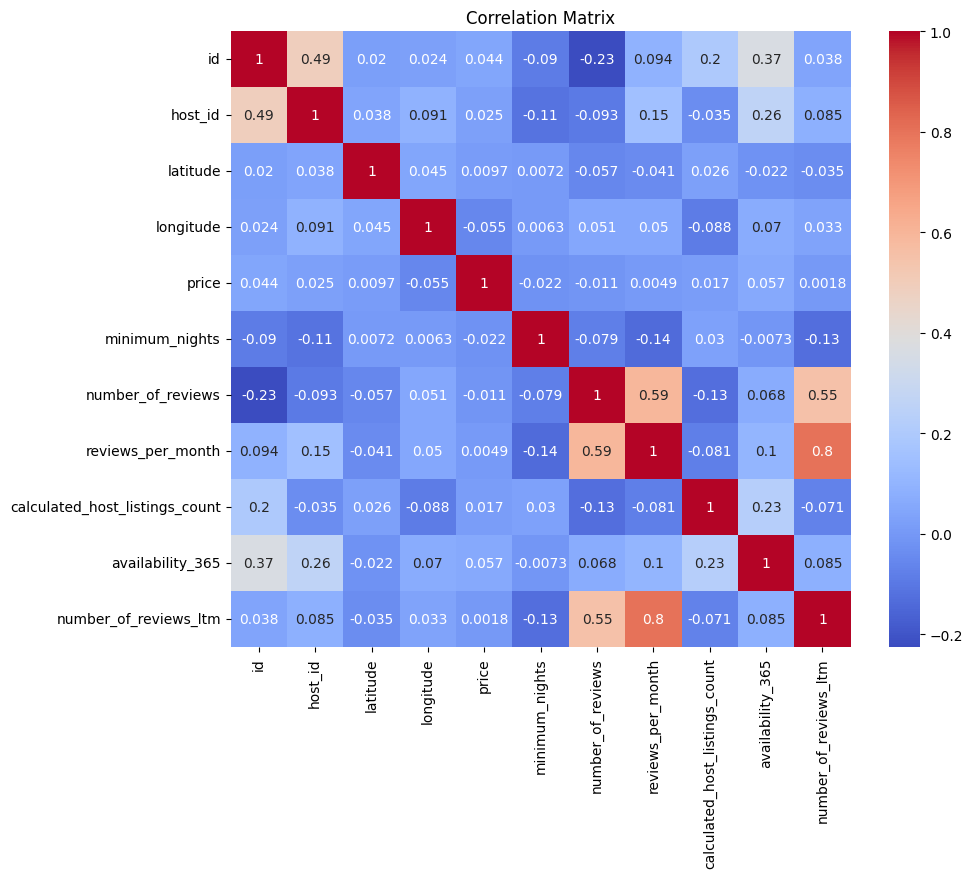

In [14]:
# Correlation matrix for numerical columns
correlation_matrix = data_cleaned[numerical_columns].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


1. What is the distribution of property prices across different neigh-
borhoods, and are there significant differences between them?

A. There seems to be an exponential pricing across different neighborhoods...
with significant differences given the average property prices

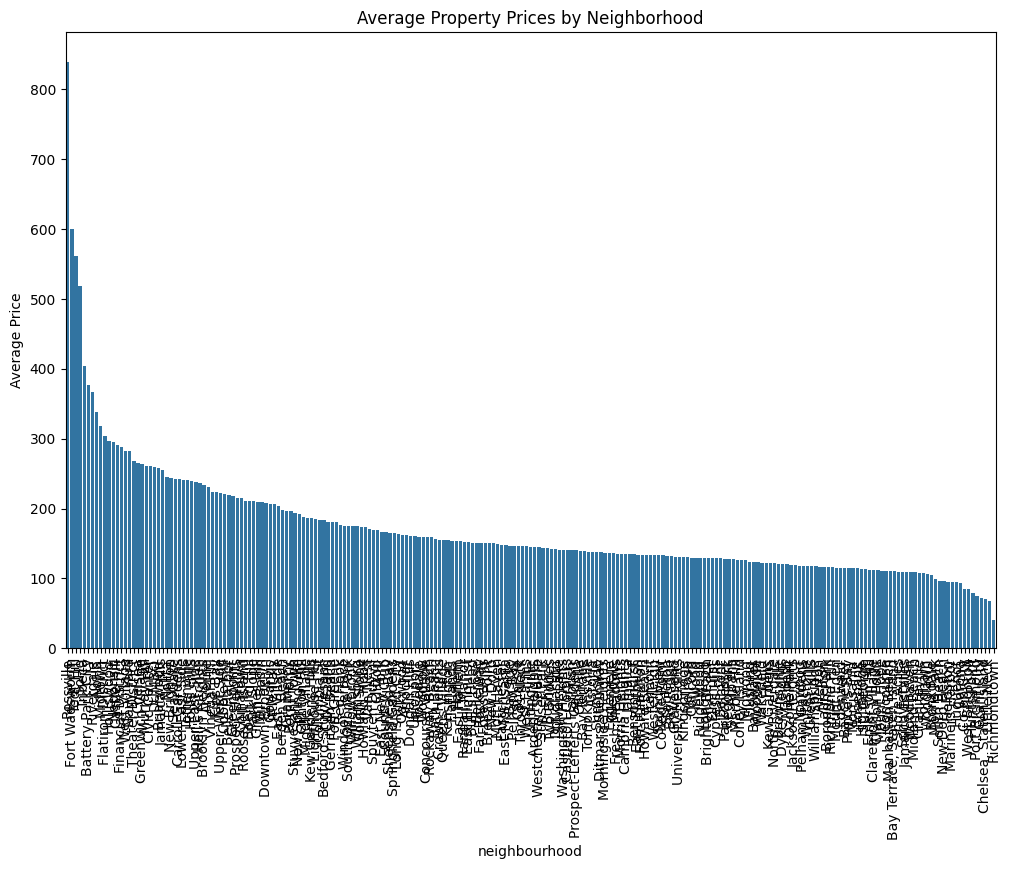

In [15]:
# Group by neighborhood and calculate the average price
avg_price_by_neighborhood = data_cleaned.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)

# Plot the distribution of prices across neighborhoods
plt.figure(figsize=(12, 8))
sns.barplot(x=avg_price_by_neighborhood.index, y=avg_price_by_neighborhood.values)
plt.xticks(rotation=90)
plt.title('Average Property Prices by Neighborhood')
plt.ylabel('Average Price')
plt.show()


2. How does the room type (Entire home/apt, Private room, etc.)
affect the price? Are certain room types consistently more ex-
pensive?

A. Room type definitely has an affect on pricing as hotels are...
consistently more epensive

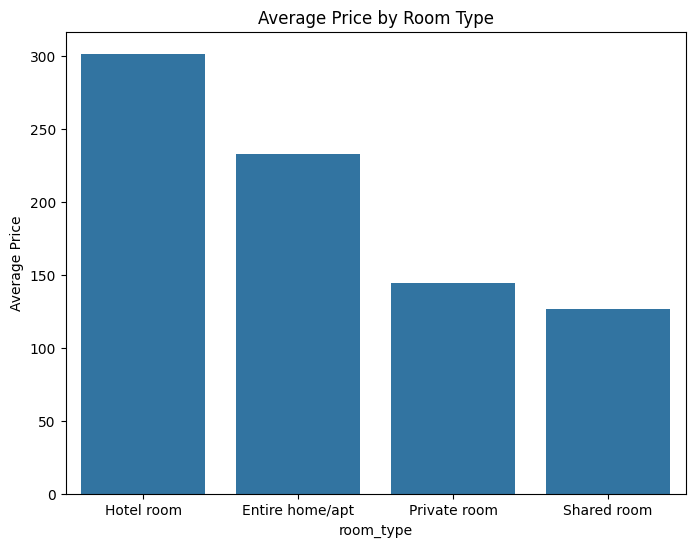

In [16]:
# Group by room type and calculate the average price
avg_price_by_room_type = data_cleaned.groupby('room_type')['price'].mean().sort_values(ascending=False)

# Plot the distribution of prices by room type
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_price_by_room_type.index, y=avg_price_by_room_type.values)
plt.title('Average Price by Room Type')
plt.ylabel('Average Price')
plt.show()


3. What is the correlation between the number of reviews and the
availability of listings (availability_365)? Do listings with more
reviews tend to be less available?

A. There seems to be no/weak correlation with number of reviews and the...
availability of listings as the number of reveiws appear to be indifferent...
from the availability of listings while a few listings tend to have higher counts of...
reviews given the increase in pricing.

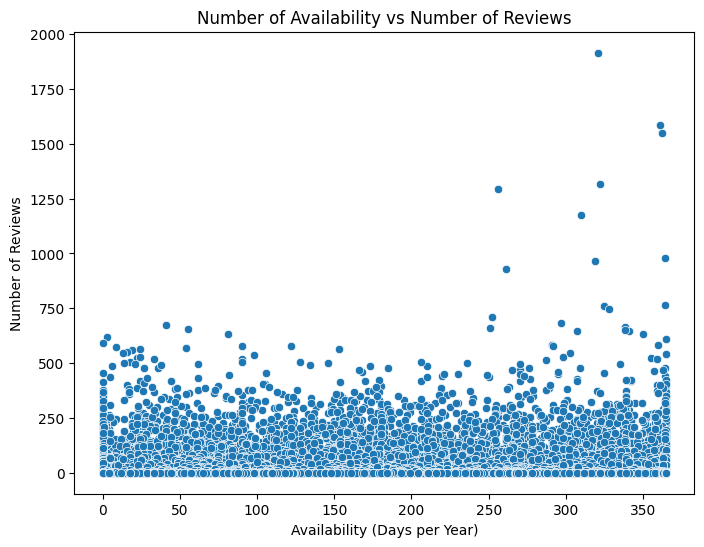

Correlation between number of reviews and availability_365:
                   availability_365  number_of_reviews
availability_365           1.000000           0.068199
number_of_reviews          0.068199           1.000000


In [17]:
# Scatter plot to visualize the relationship between number of reviews and availability
plt.figure(figsize=(8, 6))
sns.scatterplot(x='availability_365', y='number_of_reviews', data=data_cleaned)
plt.title('Number of Availability vs Number of Reviews')
plt.xlabel('Availability (Days per Year)')
plt.ylabel('Number of Reviews')
plt.show()

# Calculate and print the correlation between number of reviews and availability
correlation = data_cleaned[['availability_365', 'number_of_reviews']].corr()
print('Correlation between number of reviews and availability_365:')
print(correlation)


4. Are there any outliers in the price or minimum night stays? How
do they compare to typical listings?

A. One thing that stood out was the average price for outliers is $1,071.27, 
which is significantly higher than the overall dataset's mean of $193.37. 
There seems to be a larger count of outliers in minimum night stays vs pricing.
Likewise, the outliers in the minimum night stays seem to be lower than pricing outliers...
this leads us to believe it the minimum night stays outliers leads to more innacurate results.


In [19]:
# Detecting outliers in 'minimum_nights'
outliers_in_min_nights = detect_outliers(data_cleaned, 'minimum_nights')
print("Outliers in Minimum Night Stays:")
print(outliers_in_min_nights[['price', 'minimum_nights']].describe())

# Describe outliers for price
print("Outliers in Price:")
print(outliers_in_price[['price', 'minimum_nights']].describe())

# Compare to the overall data (without outliers)
print("Overall Dataset (without outliers):")
print(data_cleaned[['price', 'minimum_nights']].describe())


Outliers in Minimum Night Stays:
              price  minimum_nights
count   7317.000000     7317.000000
mean     267.678557       25.688260
std      502.994578       68.509868
min        8.000000        1.000000
25%      150.000000        1.000000
50%      169.000000        2.000000
75%      305.000000       31.000000
max    20000.000000     1250.000000
Outliers in Price:
               price  minimum_nights
count    1437.000000     1437.000000
mean     1071.268615       21.231037
std      2915.045933       21.962606
min       497.000000        1.000000
25%       575.000000        2.000000
50%       700.000000       30.000000
75%       999.000000       30.000000
max    100000.000000      365.000000
Overall Dataset (without outliers):
               price  minimum_nights
count   37765.000000    37765.000000
mean      193.369522       29.164597
std       599.843014       30.202538
min         8.000000        1.000000
25%       124.000000       30.000000
50%       150.000000       30.000

5. How do hosts with multiple listings compare to those with a
single listing in terms of reviews, pricing, and availability?

A. Host with multiple listings tend to have more availability than single listings,
while single listing homes have lower prices on average than multiple listings.

In [20]:
# Group by host and count the number of listings per host
host_listings = data_cleaned.groupby('host_id').agg(
    num_listings=('id', 'count'),
    avg_price=('price', 'mean'),
    avg_reviews=('number_of_reviews', 'mean'),
    avg_availability=('availability_365', 'mean')
)

# Compare hosts with multiple listings to those with single listings
multiple_listings = host_listings[host_listings['num_listings'] > 1]
single_listings = host_listings[host_listings['num_listings'] == 1]

# Print comparison statistics
print("Hosts with Multiple Listings:")
print(multiple_listings.describe())

print("\nHosts with Single Listings:")
print(single_listings.describe())


Hosts with Multiple Listings:
       num_listings     avg_price  avg_reviews  avg_availability
count   3783.000000   3783.000000  3783.000000       3783.000000
mean       4.992070    199.908432    35.863184        176.803702
std       22.515086    851.876722    58.628928        123.616190
min        2.000000     32.000000     0.000000          0.000000
25%        2.000000    101.182692     3.500000         63.100000
50%        2.000000    150.000000    14.333333        185.000000
75%        3.000000    192.500000    42.500000        283.000000
max      842.000000  50075.000000   891.500000        365.000000

Hosts with Single Listings:
       num_listings     avg_price   avg_reviews  avg_availability
count       18880.0  18880.000000  18880.000000      18880.000000
mean            1.0    179.490042     26.872299         99.929926
std             0.0    190.584374     58.507082        131.494594
min             1.0     10.000000      0.000000          0.000000
25%             1.0    150

# comparison of the performance with different msx_depth
comparison of the Decision Tree performance using various max_depth settings (e.g., 3, 5, 10) to analyze how tree depth affects overfitting and underfitting.

In [22]:
# Prepare features/target and encode categorical variables for classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

# Choose a target for classification
target = 'room_type'
X = data_cleaned.drop(columns=[target])
y = data_cleaned[target]

# Identify feature types
categorical_features = X.select_dtypes(include=['object', 'category']).columns
numeric_features = X.select_dtypes(include=[np.number]).columns

# Train/test split (stratify for balanced classes)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Ordinal-encode categorical features (Decision Trees are insensitive to scaling)
enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X_train_cat = enc.fit_transform(X_train[categorical_features])
X_test_cat = enc.transform(X_test[categorical_features])

# Combine numeric + encoded categorical into numpy arrays
X_train_num = X_train[numeric_features].to_numpy()
X_test_num = X_test[numeric_features].to_numpy()
X_train_ordinal = np.hstack([X_train_num, X_train_cat])
X_test_ordinal = np.hstack([X_test_num, X_test_cat])


Decision Tree Accuracy with max_depth=3: 0.69
Decision Tree Accuracy with max_depth=5: 0.72
Decision Tree Accuracy with max_depth=10: 0.75


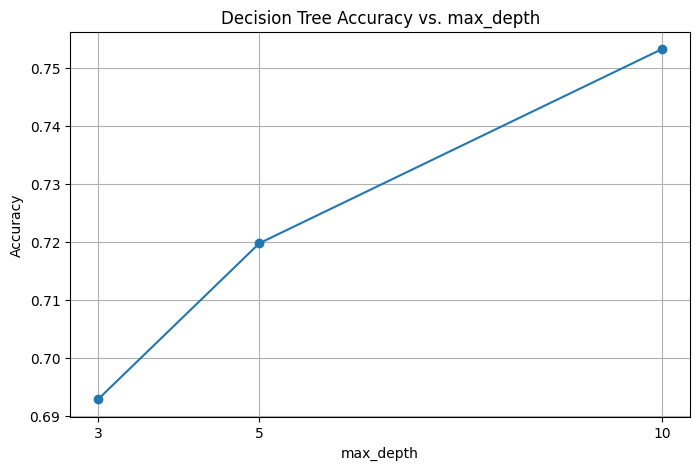

In [24]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# List of different max_depth values to test
max_depth_values = [3, 5, 10]

# Dictionary to store accuracy results for each max_depth
accuracy_results = {}

# Loop through each max_depth value
for depth in max_depth_values:
    # Train the Decision Tree model with the current max_depth
    tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree.fit(X_train_ordinal, y_train)
    
    # Predict on the test set
    y_pred = tree.predict(X_test_ordinal)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[depth] = accuracy
    
    # Print accuracy for the current max_depth
    print(f'Decision Tree Accuracy with max_depth={depth}: {accuracy:.2f}')

# Visualize the performance comparison
plt.figure(figsize=(8, 5))
plt.plot(max_depth_values, list(accuracy_results.values()), marker='o')
plt.title('Decision Tree Accuracy vs. max_depth')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.xticks(max_depth_values)
plt.grid()
plt.show()
